In [6]:
import rasterio
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [7]:
def calculate_ndwi_and_display(green_band_path, nir_band_path):
    # Open the Green band (B3)
    with rasterio.open(green_band_path) as green_src:
        green = green_src.read(1).astype(np.float32)

    # Open the NIR band (B5)
    with rasterio.open(nir_band_path) as nir_src:
        nir = nir_src.read(1).astype(np.float32)

    # Compute NDWI
    ndwi = (green - nir) / (green + nir)

    # Handle NaN values (replace NaN with 0)
    ndwi = np.nan_to_num(ndwi, nan=0.0)

    # Convert NDWI to Xarray DataArray
    ndwi_xr = xr.DataArray(ndwi, dims=["y", "x"])

    # Plot NDWI
    plt.figure(figsize=(8, 6))
    ndwi_xr.plot(cmap="Blues", vmin=-1, vmax=1)  # NDWI typically ranges from -1 to 1
    plt.title("NDWI of Landsat 8")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

<ipython-input-7-31ef37fcf11b>:11: RuntimeWarning: invalid value encountered in divide
  ndwi = (green - nir) / (green + nir)


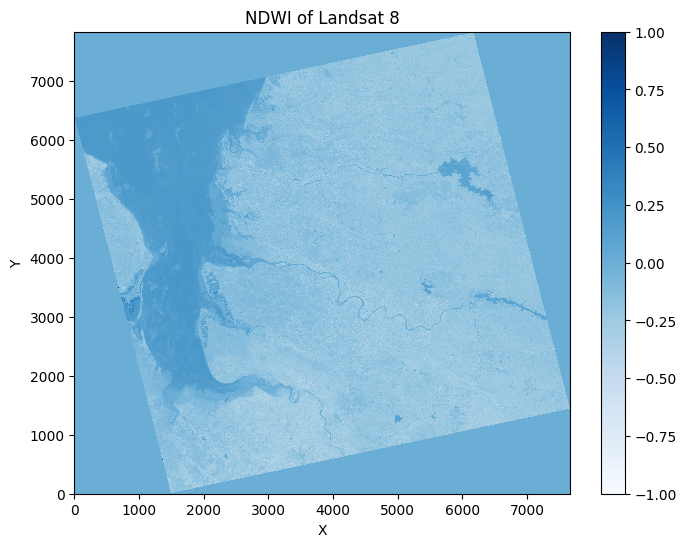

In [8]:
green_band = r'/content/drive/MyDrive/ndwi_folder/LC08_B3.TIF'
nir_band = r'/content/drive/MyDrive/ndwi_folder/LC08_B5.TIF'
calculate_ndwi_and_display(green_band, nir_band)